<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Case-2:-Pneumonia-X-ray-image-analysis-(Model-3)" data-toc-modified-id="Case-2:-Pneumonia-X-ray-image-analysis"><span class="toc-item-num">1&nbsp;&nbsp;</span>Case 2: Pneumonia X-ray image analysis</a></span></li><li><span><a href="#Background" data-toc-modified-id="Background-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Background</a></span></li><li><span><a href="#Data" data-toc-modified-id="Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data</a></span></li><li><span><a href="#Models-and-training" data-toc-modified-id="Models-and-training-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Models and training</a></span></li><li><span><a href="#Results-and-Discussion" data-toc-modified-id="Results-and-Discussion-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Results and Discussion</a></span></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Conclusions</a></span></li></ul></div>

# Case 2: Pneumonia X-ray image analysis (Model 2)
Team 16:
    1. Bellarina Chew
    2. Nik Adam Nik Joharris
    3. Valentin Dassin
Last modified: 27.02.2020<br>
Neural Networks for Health Technology Applications<br>
[Helsinki Metropolia University of Applied Sciences](http://www.metropolia.fi/en/)<br>

## Background
The aim of this notebook is to create and train a dense neural network to classify medical images accurately with convolutional neural network using the dataset from https://data.mendeley.com/datasets/rscbjbr9sj/2 

## Data
The dataset used is a dataset of Labeled Optical Coherence Tomography (OCT) and Chest X-Ray Images for Classification from Mendeley Data [1].

In [1]:
# Import necessary module
%pylab inline
import os
import time
import shutil
import random
import pandas as pd
import tensorflow as tf

# Import libraries
from tensorflow import keras

# Import keras specific
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.metrics import Accuracy, FalseNegatives, FalsePositives
from sklearn.metrics import classification_report, confusion_matrix, roc_curve

Populating the interactive namespace from numpy and matplotlib


#### Load training files

In [2]:
# Training files can be found here
#train_dir = "/Users/bella/Desktop/year 3/Neural Network/chest_xray/train"

# Test files can be found here
train_dir = "/Users/User/Desktop/Boulot/DUETI/S2/1rst part/neural/ChestXRay2017/chest_xray/train"
test_dir = "/Users/User/Desktop/Boulot/DUETI/S2/1rst part/neural/ChestXRay2017/chest_xray/test"

# List training files
print('Training file directory :', os.listdir(train_dir))

# list test files
print('Testing file directory :', os.listdir(test_dir))

Training file directory : ['.DS_Store', 'NORMAL', 'PNEUMONIA']
Testing file directory : ['.DS_Store', 'NORMAL', 'PNEUMONIA']


### Preprocess data

#### Scaling
The data must be preprocessed before training the network. Scale these images to a range of 0 to 1 before feeding them to the neural network model.<br>
#### Split data
We will also split the <b>training data</b> into training and validation sets where :
- Training data = 70%
- Validation data = 30%

In [3]:
# Rescale training images and split training data
train_datagen = ImageDataGenerator (rescale=1./255, validation_split = 0.3)

#### Create data generators

In [4]:
# training data generator
print('Training : ')
train_generator = train_datagen.flow_from_directory(
    train_dir, #target directory
    target_size = (150, 150), #Image resize
    batch_size = 16,
    class_mode = 'binary', # since we only have 2 classification: normal/pneumonia
    subset = "training")

# validation data generator
print('\nValidation : ')
dev_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 16,
    class_mode = 'binary',
    shuffle=False,
    subset = "validation")
#train_generator.class_indices

Training : 
Found 3664 images belonging to 2 classes.

Validation : 
Found 1568 images belonging to 2 classes.


#### Now we test if the train generator works :


The first image from the training batch : 


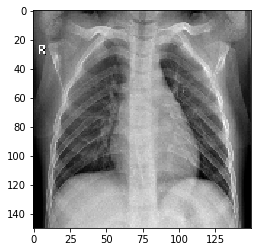

If you inspect the first image from the batch, you will see that the pixel values fall in the range of 0 to 224

labels batch : 


array([0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0.],
      dtype=float32)

In [5]:
# labels_batch place labels automatically. For whichever folder to come first alphabetically, it will be labelled 0. 
# e.g normal =0 and pneumonia=1
i = 0
for data_batch, labels_batch in train_generator:
#     print('data batch shape:', data_batch.shape)
#     print('labels batch shape:', labels_batch.shape)
    i = i + 1
    if i > 5:
        break  
        
# Testing continues
# Then we will check the first image from the training batch
print('\nThe first image from the training batch : ')
imshow(data_batch[0])
show()

print('If you inspect the first image from the batch, you will see that the pixel values fall in the range of 0 to 224')

# Testng continues
# We will then check the last labels batch
print('\nlabels batch : ')
labels_batch

## Models and training
This model was  designed to add a more complex netwok of dense layer inside of the model n°1 witch was working quite well thanks to the idea of the dropout layer.
So in this Notebook, we gonna add 2 dense layers (one of 128 and an other of 32) to check if the data is not shrinked after the dense layer of 512 neurons and the sigmoid of 1 neuron.

In [6]:
#For this model, we still keep the droupout layers and all the others concolutional layers but we are adding some dense layers
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dense(32, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

### Compile the model :
Before the model is ready for training, it needs a few more settings to compile.

In [7]:
# Use different set of metrics 
my_metrics = ['acc', FalseNegatives(), FalsePositives()]

#To reduce the CPU running time, we increase a bit the learning rate
model.compile(loss = 'binary_crossentropy', 
              optimizer = optimizers.RMSprop(lr = 3.0e-4), 
              metrics = my_metrics)

### Train the model :
To start training, we call the model.fit method to "fit" the model to the data:

In [8]:
# Start the clock
t_start = time.time()

print('Training...', end='')
h = model.fit_generator(
    train_generator,
    steps_per_epoch=None,
    verbose=0,
    epochs=4,
    validation_data=dev_generator,
    validation_steps=None)

# Cehcl the time and calculate the elapsed time and time per epoch
t_end = time.time()
t_elapsed = t_end - t_start
t_per_epoch = t_elapsed/3

print('Done')
print(f'Time elapsed = {t_elapsed:.0f} seconds')
print(f'Time per epoch = {t_per_epoch:.2f} seconds')

Training...Done
Time elapsed = 2198 seconds
Time per epoch = 732.77 seconds


In [9]:
hh = h.history
acc = hh['acc']
acc_v = hh['val_acc']
fn = hh['false_negatives']
fn_v = hh['val_false_negatives']
fp = hh['false_positives']
fp_v = hh['val_false_positives']
loss = hh['loss']
loss_v = hh['val_loss']
epochs = arange(len(loss)) + 1

show()

## Results and Discussion

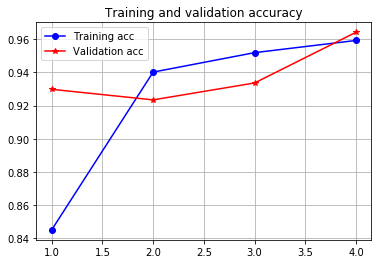

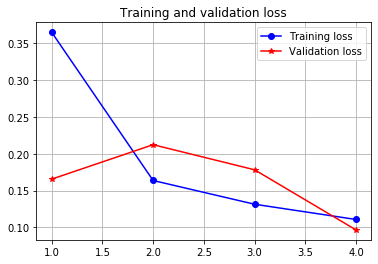

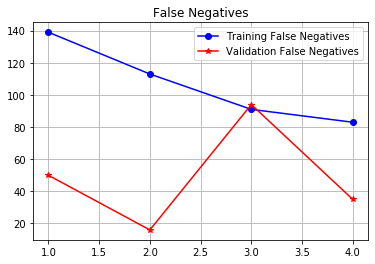

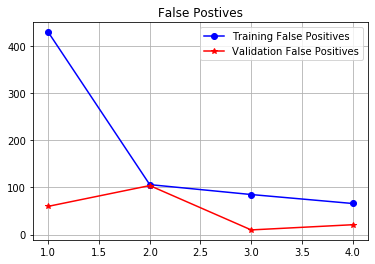

In [10]:
# plot accuracy and loss lerning curves, but also false positive and negative for training and validation set
plot(epochs, acc, 'bo-', label='Training acc')
plot(epochs, acc_v, 'r*-', label='Validation acc')
title('Training and validation accuracy')
grid()
legend()

figure()
plot(epochs, loss, 'bo-', label='Training loss')
plot(epochs, loss_v, 'r*-', label='Validation loss')
title('Training and validation loss')
legend()
grid()

figure()
plot(epochs, fn, 'bo-', label='Training False Negatives')
plot(epochs, fn_v, 'r*-', label='Validation False Negatives')
title('False Negatives')
legend()
grid()

figure()
plot(epochs, fp, 'bo-', label='Training False Positives')
plot(epochs, fp_v, 'r*-', label='Validation False Positives')
title('False Postives')
legend()

grid()
show()

In [11]:
labels = dev_generator.classes

predicted = model.predict_generator(dev_generator).flatten()

cm = confusion_matrix(labels, predicted > 0.5)
print(cm)

[[ 383   21]
 [  35 1129]]


In [12]:
# Calculate classification report 
cr = classification_report(labels, predicted > 0.5, target_names=['Normal (0)', 'Pneumonia (1)'])
print(cr)

               precision    recall  f1-score   support

   Normal (0)       0.92      0.95      0.93       404
Pneumonia (1)       0.98      0.97      0.98      1164

     accuracy                           0.96      1568
    macro avg       0.95      0.96      0.95      1568
 weighted avg       0.96      0.96      0.96      1568



Lets use various metrics to gain insights of the model's performance. First we will have to find the best threshold from ROC curve.

### ROC curve

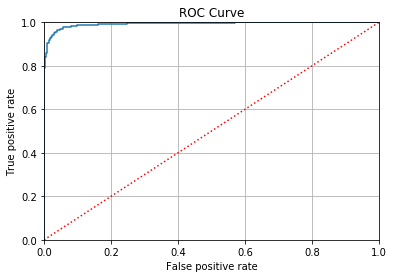

In [13]:
#ROC curve analysis
fpr, tpr, thresholds = roc_curve(labels, predicted, pos_label = 1)
plot(fpr, tpr)
plot([0,1], [0,1], 'r:')
xlabel('False positive rate')
ylabel('True positive rate')
title('ROC Curve')
xlim([0,1])
ylim([0,1])
grid()

In ROC curve, the true positive rate (Sensitivity) is plotted in function of the false positive rate (100-Specificity) for different cut-off points. The closer the ROC curve is to the upper left corner, the higher the overall accuracy of the test (Zweig & Campbell, 1993). This means, this model has a high overall accuracy. After obtaining the TPR and FPR, we will be able to identify the best threshold.

### Threshold analysis
The best threshold would be obtained by using the roc curve where true positive rate(tpr) and false positive rate(fpr) overlap.

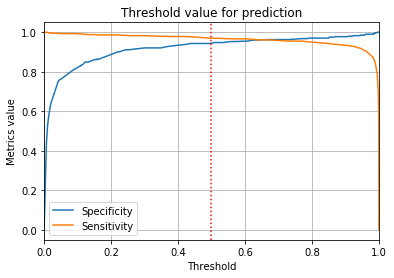

In [14]:
#Find the threshold
plot(thresholds, 1 - fpr, label = 'Specificity')
plot(thresholds, tpr, label = 'Sensitivity')
axvline(0.5, color = 'red', linestyle=':')
xlim([0,1])
title('Threshold value for prediction')
xlabel('Threshold')
ylabel('Metrics value')
legend()
grid()

The best threshold is arround 0.90
### Evaluate accuracy
After training is complete, we'll evaluate how the model performs with the best threshold. 

In [15]:
# reset the validation generator and then use our trained model to make predictions on the data
print("[INFO] evaluating network...")
dev_generator.reset()
predict = model.predict_generator(dev_generator)

# for each image in the testing set we need to find the labels
labels = dev_generator.classes

# show a nicely formatted classification report
print(classification_report(labels, predict>0.90, target_names=['Normal(0)', 'Pneumonia(1)']))

[INFO] evaluating network...
              precision    recall  f1-score   support

   Normal(0)       0.84      0.98      0.90       404
Pneumonia(1)       0.99      0.94      0.96      1164

    accuracy                           0.95      1568
   macro avg       0.92      0.96      0.93      1568
weighted avg       0.95      0.95      0.95      1568



In [16]:
# compute the confusion matrix and use it to derive the raw accuracy, sensitivity, and specificity
cm = confusion_matrix(labels, predict>0.90)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])

# show the confusion matrix, accuracy, sensitivity, and specificity
print(cm)
print("\naccuracy: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

[[ 395    9]
 [  75 1089]]

accuracy: 0.9464
sensitivity: 0.9777
specificity: 0.9356


# Model 2: Observations

As we can see it very easelly on the ROC Curve, the results are pretty good and maybe good enouth to be considered to be used in a medical perspective. The accuracy and loss curves inform us that the is no overfitting.

Compared to the previous model(1), we observe that our sensitivity have decreased a little lit. However, the specificity has been improved a lot (0.868 VS 0.935). In a medical perspective, that means that less people that doesn't have pneumonia will be diagnosticated positive. That can save quite a lot of medical ressouces and avoid caring for a patient who isn't sick.

Also, in average, we are obtaining better results than the Model 1 with quite the same number of parameter (3,43 VS 3,52 million of parameters) that is to say that this model doesn't need mutch more ressources to archive better results, so that consits as an improvment

# Model 2: Conclusions

To conclude about this model, we can observe that a fine Dense layer network can improve quite a lot the results obtained with a good convolutionnal neural network without adding too mutch ressource's requirements.